In [1]:

import warnings

import matplotlib.pyplot as plt
# import MultiTrade
import numpy as np
import pandas as pd
from IPython.display import display
from neuralforecast.core import NeuralForecast
from neuralforecast.losses.numpy import mae, mse
from neuralforecast.models import NBEATS, BiTCN, TFT
from statsforecast import StatsForecast

from utils.utils import build_market_image

warnings.filterwarnings("ignore")

In [2]:
COIN_PAIRS=['BTC/USDT','ETH/USDT','SOL/USDT','BNB/USDT','XRP/USDT','ADA/USDT',
            'ETH/BTC','SOL/ETH','BNB/ETH','XRP/ETH',"ADA/ETH",
            'SOL/BTC','SOL/BNB',
            'XRP/BTC','XRP/BNB',
            'ADA/BTC','ADA/BNB',
            ]
target_pair='ETHUSDT'
time_frame="1h"

In [3]:
time_frame='1h'
horizon = 7
context_length=5*horizon
start_dt=pd.Timestamp('2024-01-01')
split_dt=pd.Timestamp('2024-10-15')
end_dt=pd.Timestamp('2024-10-20')
split_buffer=pd.Timedelta(unit=time_frame[-1],value=context_length)

In [4]:

data=build_market_image(target_pair='ETH/USDT',time_frame=time_frame,axis=0)


train_data=data.groupby('symbol').apply(lambda x: x[start_dt:split_dt])
test_data=data.groupby('symbol').apply(lambda x: x[split_dt-split_buffer:end_dt])

train_data=train_data.reset_index(level=0,drop=True).reset_index()
test_data=test_data.reset_index(level=0,drop=True).reset_index()
# data=data[data['symbol']==target_pair].copy()
data['symbol'].unique()
id_col='symbol'


test_data

['data/binanceus-ADAUSDT-1h.pkl', 'data/binanceus-ETHUSDT-1h.pkl', 'data/binanceus-XRPUSDT-1h.pkl', 'data/binanceus-BNBUSDT-1h.pkl', 'data/binanceus-SOLUSDT-1h.pkl', 'data/binanceus-BTCUSDT-1h.pkl']


0it [00:00, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

,date_close,open,high,low,close,volume,y,feature_hour_of_day,feature_day_of_week,feature_day_of_month,...,feature_BBANDS_BB_UPPER,feature_BBANDS_BB_MIDDLE,feature_BBANDS_BB_LOWER,feature_MACD_MACD,feature_MACD_SIGNAL,feature_14_period_RSI,feature_14_period_STOCH_%K,ds,unique_id,symbol
0,2024-10-13 13:00:00,0.3525,0.3533,0.3524,0.3524,1514.0,0.3524,0.065217,0.500000,-0.100000,...,0.357418,0.353895,0.350372,0.000508,0.000887,44.864573,18.421053,2024-10-13 13:00:00,3,ADAUSDT
1,2024-10-13 14:00:00,0.3520,0.3531,0.3519,0.3522,104629.4,0.3522,0.108696,0.500000,-0.100000,...,0.357423,0.353820,0.350217,0.000314,0.000772,44.103142,15.789474,2024-10-13 14:00:00,3,ADAUSDT
2,2024-10-13 15:00:00,0.3518,0.3518,0.3480,0.3483,147831.9,0.3483,0.152174,0.500000,-0.100000,...,0.357949,0.353590,0.349231,-0.000153,0.000587,32.514671,2.830189,2024-10-13 15:00:00,3,ADAUSDT
3,2024-10-13 16:00:00,0.3481,0.3481,0.3441,0.3450,47057.1,0.3450,0.195652,0.500000,-0.100000,...,0.359019,0.353215,0.347411,-0.000780,0.000314,26.233427,6.206897,2024-10-13 16:00:00,3,ADAUSDT
4,2024-10-13 17:00:00,0.3443,0.3469,0.3439,0.3464,13386.7,0.3464,0.239130,0.500000,-0.100000,...,0.359465,0.352910,0.346355,-0.001151,0.000021,32.216054,17.006803,2024-10-13 17:00:00,3,ADAUSDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2024-10-19 20:00:00,0.5410,0.5424,0.5409,0.5411,2255.0,0.5411,0.369565,0.333333,0.100000,...,0.549908,0.545135,0.540362,-0.001382,-0.000889,34.677298,12.820513,2024-10-19 20:00:00,16,XRPUSDT
932,2024-10-19 21:00:00,0.5417,0.5433,0.5417,0.5427,26841.0,0.5427,0.413043,0.333333,0.100000,...,0.549870,0.544985,0.540100,-0.001334,-0.000978,42.263183,33.333333,2024-10-19 21:00:00,16,XRPUSDT
933,2024-10-19 22:00:00,0.5428,0.5428,0.5421,0.5421,10704.0,0.5421,0.456522,0.333333,0.100000,...,0.549719,0.544750,0.539781,-0.001329,-0.001048,40.369899,25.641026,2024-10-19 22:00:00,16,XRPUSDT
934,2024-10-19 23:00:00,0.5416,0.5427,0.5416,0.5427,430.0,0.5427,0.500000,0.333333,0.100000,...,0.549131,0.544450,0.539769,-0.001263,-0.001091,43.114263,33.333333,2024-10-19 23:00:00,16,XRPUSDT


In [5]:
train_data

,date_close,open,high,low,close,volume,y,feature_hour_of_day,feature_day_of_week,feature_day_of_month,...,feature_BBANDS_BB_UPPER,feature_BBANDS_BB_MIDDLE,feature_BBANDS_BB_LOWER,feature_MACD_MACD,feature_MACD_SIGNAL,feature_14_period_RSI,feature_14_period_STOCH_%K,ds,unique_id,symbol
0,2024-01-01 07:00:00,0.5926,0.5977,0.5923,0.5973,10112.1,0.5973,-0.195652,-0.500000,-0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-01-01 07:00:00,3,ADAUSDT
1,2024-01-01 08:00:00,0.5977,0.5995,0.5976,0.5985,5499.7,0.5985,-0.152174,-0.500000,-0.500000,...,0.000000,0.000000,0.000000,0.000027,0.000015,100.000000,0.000000,2024-01-01 08:00:00,3,ADAUSDT
2,2024-01-01 09:00:00,0.5992,0.5993,0.5982,0.5985,470.5,0.5985,-0.108696,-0.500000,-0.500000,...,0.000000,0.000000,0.000000,0.000034,0.000023,100.000000,0.000000,2024-01-01 09:00:00,3,ADAUSDT
3,2024-01-01 10:00:00,0.5995,0.6023,0.5995,0.6023,19624.2,0.6023,-0.065217,-0.500000,-0.500000,...,0.000000,0.000000,0.000000,0.000174,0.000074,100.000000,0.000000,2024-01-01 10:00:00,3,ADAUSDT
4,2024-01-01 11:00:00,0.6016,0.6031,0.6009,0.6020,4016.8,0.6020,-0.021739,-0.500000,-0.500000,...,0.000000,0.000000,0.000000,0.000234,0.000122,93.736113,0.000000,2024-01-01 11:00:00,3,ADAUSDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41431,2024-10-14 20:00:00,0.5472,0.5476,0.5461,0.5468,334.0,0.5468,0.369565,-0.500000,-0.066667,...,0.550871,0.539670,0.528469,0.003521,0.002635,66.768708,76.978417,2024-10-14 20:00:00,16,XRPUSDT
41432,2024-10-14 21:00:00,0.5462,0.5482,0.5461,0.5473,7410.0,0.5473,0.413043,-0.500000,-0.066667,...,0.551155,0.540565,0.529975,0.003584,0.002825,67.522179,80.575540,2024-10-14 21:00:00,16,XRPUSDT
41433,2024-10-14 22:00:00,0.5467,0.5471,0.5449,0.5458,394.0,0.5458,0.456522,-0.500000,-0.066667,...,0.551050,0.541325,0.531600,0.003472,0.002954,62.913576,67.938931,2024-10-14 22:00:00,16,XRPUSDT
41434,2024-10-14 23:00:00,0.5460,0.5482,0.5457,0.5475,2394.0,0.5475,0.500000,-0.500000,-0.066667,...,0.550682,0.542205,0.533728,0.003481,0.003060,65.765447,80.916031,2024-10-14 23:00:00,16,XRPUSDT


In [6]:
front=['y','ds','symbol']
exo_gen_cols=data.filter(like='feature_').columns.tolist()
cols=front+[c for c in exo_gen_cols if c not in front]

train_data=train_data[cols]
test_data=test_data[cols]
train_data
# data[id_col].unique()
# 

,y,ds,symbol,feature_hour_of_day,feature_day_of_week,feature_day_of_month,feature_day_of_year,feature_BBANDS_BB_UPPER,feature_BBANDS_BB_MIDDLE,feature_BBANDS_BB_LOWER,feature_MACD_MACD,feature_MACD_SIGNAL,feature_14_period_RSI,feature_14_period_STOCH_%K
0,0.5973,2024-01-01 07:00:00,ADAUSDT,-0.195652,-0.500000,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5985,2024-01-01 08:00:00,ADAUSDT,-0.152174,-0.500000,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000027,0.000015,100.000000,0.000000
2,0.5985,2024-01-01 09:00:00,ADAUSDT,-0.108696,-0.500000,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000034,0.000023,100.000000,0.000000
3,0.6023,2024-01-01 10:00:00,ADAUSDT,-0.065217,-0.500000,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000174,0.000074,100.000000,0.000000
4,0.6020,2024-01-01 11:00:00,ADAUSDT,-0.021739,-0.500000,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000234,0.000122,93.736113,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41431,0.5468,2024-10-14 20:00:00,XRPUSDT,0.369565,-0.500000,-0.066667,0.286301,0.550871,0.539670,0.528469,0.003521,0.002635,66.768708,76.978417
41432,0.5473,2024-10-14 21:00:00,XRPUSDT,0.413043,-0.500000,-0.066667,0.286301,0.551155,0.540565,0.529975,0.003584,0.002825,67.522179,80.575540
41433,0.5458,2024-10-14 22:00:00,XRPUSDT,0.456522,-0.500000,-0.066667,0.286301,0.551050,0.541325,0.531600,0.003472,0.002954,62.913576,67.938931
41434,0.5475,2024-10-14 23:00:00,XRPUSDT,0.500000,-0.500000,-0.066667,0.286301,0.550682,0.542205,0.533728,0.003481,0.003060,65.765447,80.916031


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


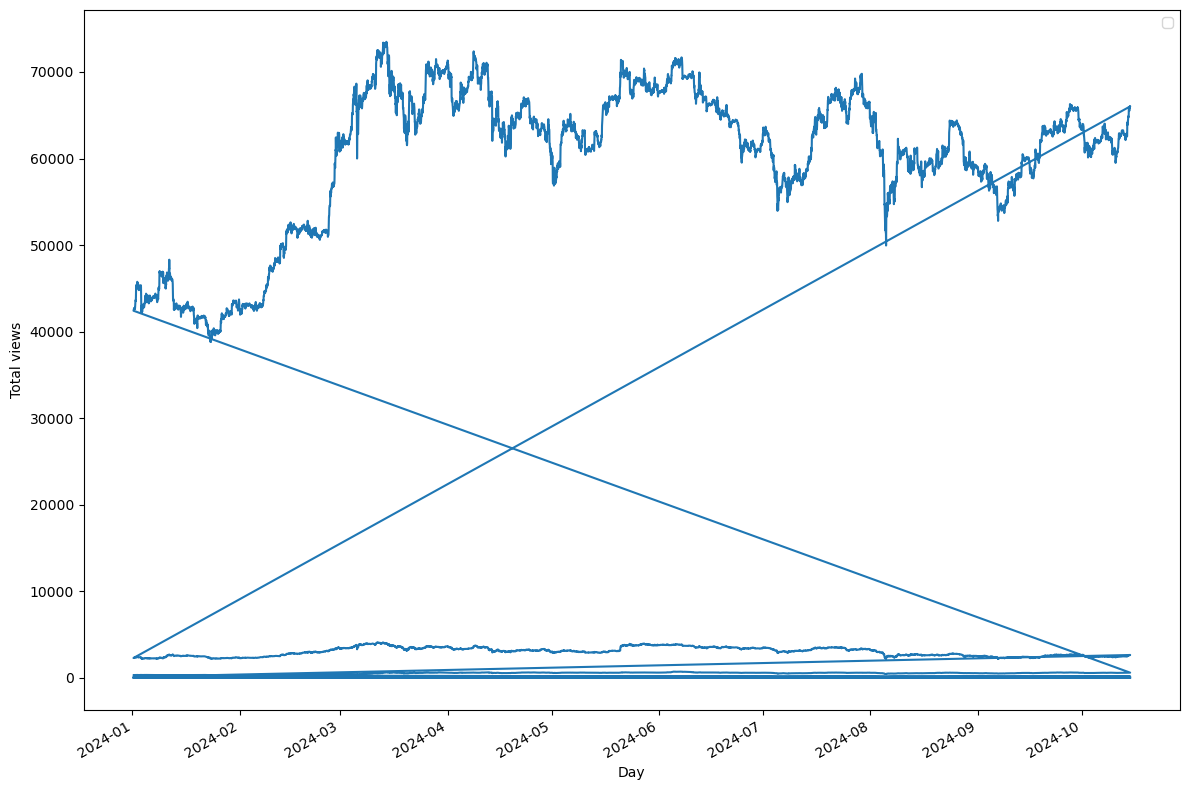

In [7]:


fig, ax = plt.subplots(figsize=(12,8))

ax.plot(train_data['ds'], train_data['y'])
# ax.scatter(data['ds'], data['y'], marker='o', color='red', label='New article')
ax.set_xlabel('Day')
ax.set_ylabel('Total views')
ax.legend(loc='best')

fig.autofmt_xdate()


plt.tight_layout()

In [8]:
# # split=int(len(data)*.7)
# # print(split)
# # train = data[:split]
# # test = data[split:]
# future_exog = test[[id_col,'y']]



In [9]:
horizon = 7
context_length=5*horizon
max_steps=2000
models = [NBEATS(h=horizon,
               input_size=context_length,
               hist_exog_list = exo_gen_cols,
               max_steps=max_steps,
               enable_progress_bar=False
               ),
         BiTCN(h=horizon,
               input_size=context_length,
               hist_exog_list = exo_gen_cols,

               max_steps=max_steps,
               enable_progress_bar=False
               
               ),
         TFT(h=horizon,
                 input_size=context_length,
                 hist_exog_list= exo_gen_cols,

                 max_steps=max_steps,
                 enable_progress_bar=False
                 
                 )
                 ]
model = NeuralForecast(models=models,
                    local_scaler_type='robust',
                    

                     freq='1h')

Seed set to 1
Seed set to 1
Seed set to 1


In [10]:
model.fit(train_data,
        val_size=horizon,
        time_col='ds',                    
        target_col='y',
        id_col=id_col,
        
        )


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.5 M 
-----------------------------------------------
2.5 M     Trainable params
630       Non-trainable params
2.5 M     Total params
9.827     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_steps=2000` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm 

In [11]:
model.save('MultiHeadForecastingModel/',overwrite=True)

In [12]:
test_dates=test_data.sort_values('ds')['ds'].unique()
last_date=train_data['ds'].unique()[-1]

In [13]:
test_data

,y,ds,symbol,feature_hour_of_day,feature_day_of_week,feature_day_of_month,feature_day_of_year,feature_BBANDS_BB_UPPER,feature_BBANDS_BB_MIDDLE,feature_BBANDS_BB_LOWER,feature_MACD_MACD,feature_MACD_SIGNAL,feature_14_period_RSI,feature_14_period_STOCH_%K
0,0.3524,2024-10-13 13:00:00,ADAUSDT,0.065217,0.500000,-0.100000,0.283562,0.357418,0.353895,0.350372,0.000508,0.000887,44.864573,18.421053
1,0.3522,2024-10-13 14:00:00,ADAUSDT,0.108696,0.500000,-0.100000,0.283562,0.357423,0.353820,0.350217,0.000314,0.000772,44.103142,15.789474
2,0.3483,2024-10-13 15:00:00,ADAUSDT,0.152174,0.500000,-0.100000,0.283562,0.357949,0.353590,0.349231,-0.000153,0.000587,32.514671,2.830189
3,0.3450,2024-10-13 16:00:00,ADAUSDT,0.195652,0.500000,-0.100000,0.283562,0.359019,0.353215,0.347411,-0.000780,0.000314,26.233427,6.206897
4,0.3464,2024-10-13 17:00:00,ADAUSDT,0.239130,0.500000,-0.100000,0.283562,0.359465,0.352910,0.346355,-0.001151,0.000021,32.216054,17.006803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.5411,2024-10-19 20:00:00,XRPUSDT,0.369565,0.333333,0.100000,0.300000,0.549908,0.545135,0.540362,-0.001382,-0.000889,34.677298,12.820513
932,0.5427,2024-10-19 21:00:00,XRPUSDT,0.413043,0.333333,0.100000,0.300000,0.549870,0.544985,0.540100,-0.001334,-0.000978,42.263183,33.333333
933,0.5421,2024-10-19 22:00:00,XRPUSDT,0.456522,0.333333,0.100000,0.300000,0.549719,0.544750,0.539781,-0.001329,-0.001048,40.369899,25.641026
934,0.5427,2024-10-19 23:00:00,XRPUSDT,0.500000,0.333333,0.100000,0.300000,0.549131,0.544450,0.539769,-0.001263,-0.001091,43.114263,33.333333


In [14]:
fcst_df = model.predict()
plot_df=train_data.groupby('symbol').tail(context_length)
plot_df
# fcst_df.tail()

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


,y,ds,symbol,feature_hour_of_day,feature_day_of_week,feature_day_of_month,feature_day_of_year,feature_BBANDS_BB_UPPER,feature_BBANDS_BB_MIDDLE,feature_BBANDS_BB_LOWER,feature_MACD_MACD,feature_MACD_SIGNAL,feature_14_period_RSI,feature_14_period_STOCH_%K
6871,0.3522,2024-10-13 14:00:00,ADAUSDT,0.108696,0.500000,-0.100000,0.283562,0.357423,0.353820,0.350217,0.000314,0.000772,44.103142,15.789474
6872,0.3483,2024-10-13 15:00:00,ADAUSDT,0.152174,0.500000,-0.100000,0.283562,0.357949,0.353590,0.349231,-0.000153,0.000587,32.514671,2.830189
6873,0.3450,2024-10-13 16:00:00,ADAUSDT,0.195652,0.500000,-0.100000,0.283562,0.359019,0.353215,0.347411,-0.000780,0.000314,26.233427,6.206897
6874,0.3464,2024-10-13 17:00:00,ADAUSDT,0.239130,0.500000,-0.100000,0.283562,0.359465,0.352910,0.346355,-0.001151,0.000021,32.216054,17.006803
6875,0.3459,2024-10-13 18:00:00,ADAUSDT,0.282609,0.500000,-0.100000,0.283562,0.359814,0.352550,0.345286,-0.001468,-0.000277,31.241533,13.605442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41431,0.5468,2024-10-14 20:00:00,XRPUSDT,0.369565,-0.500000,-0.066667,0.286301,0.550871,0.539670,0.528469,0.003521,0.002635,66.768708,76.978417
41432,0.5473,2024-10-14 21:00:00,XRPUSDT,0.413043,-0.500000,-0.066667,0.286301,0.551155,0.540565,0.529975,0.003584,0.002825,67.522179,80.575540
41433,0.5458,2024-10-14 22:00:00,XRPUSDT,0.456522,-0.500000,-0.066667,0.286301,0.551050,0.541325,0.531600,0.003472,0.002954,62.913576,67.938931
41434,0.5475,2024-10-14 23:00:00,XRPUSDT,0.500000,-0.500000,-0.066667,0.286301,0.550682,0.542205,0.533728,0.003481,0.003060,65.765447,80.916031


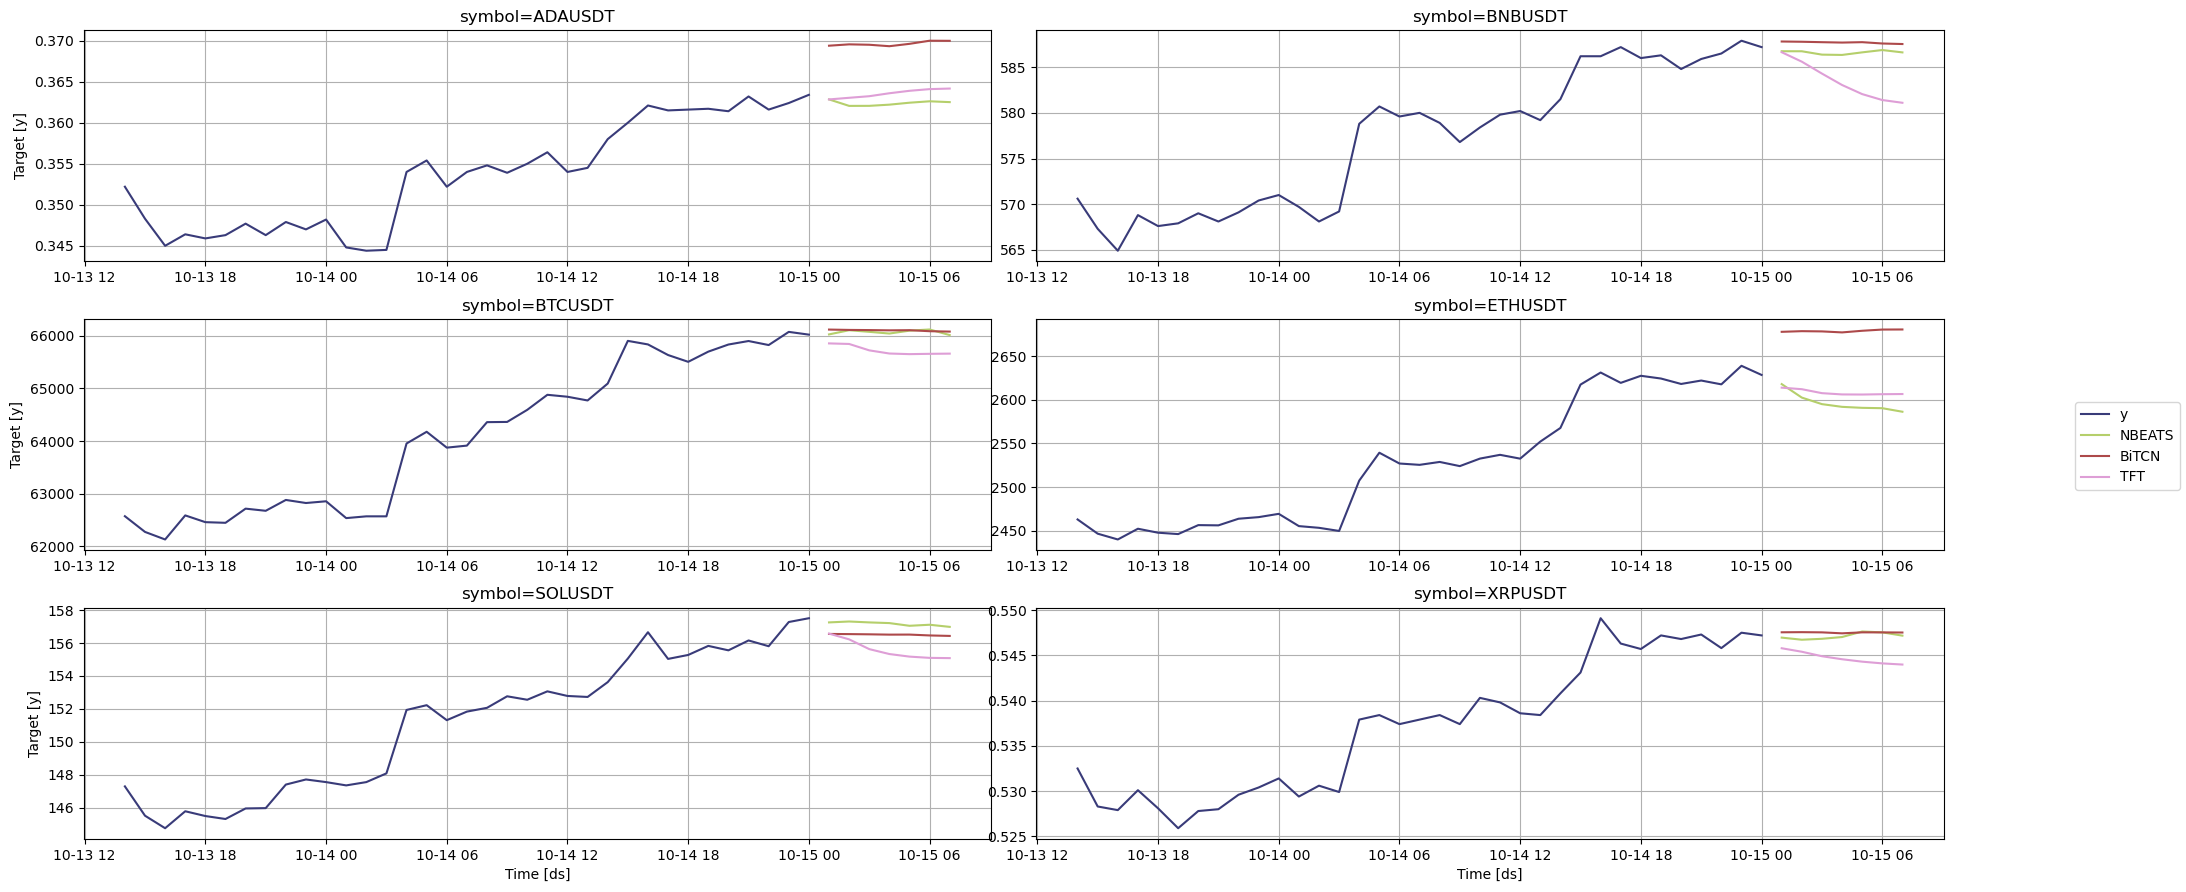

In [15]:
StatsForecast.plot(plot_df, fcst_df, engine='matplotlib',id_col=id_col, max_insample_length=context_length,)


In [16]:
pred_frame=data.groupby('symbol').apply(lambda x: x[last_date-split_buffer:split_dt])
pred_frame=pred_frame.reset_index(level=0,drop=True).reset_index()
pred_frame=pred_frame.drop('date_close',axis=1)

In [17]:
fcst_df = model.predict(pred_frame)

# fcst_df.head()

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


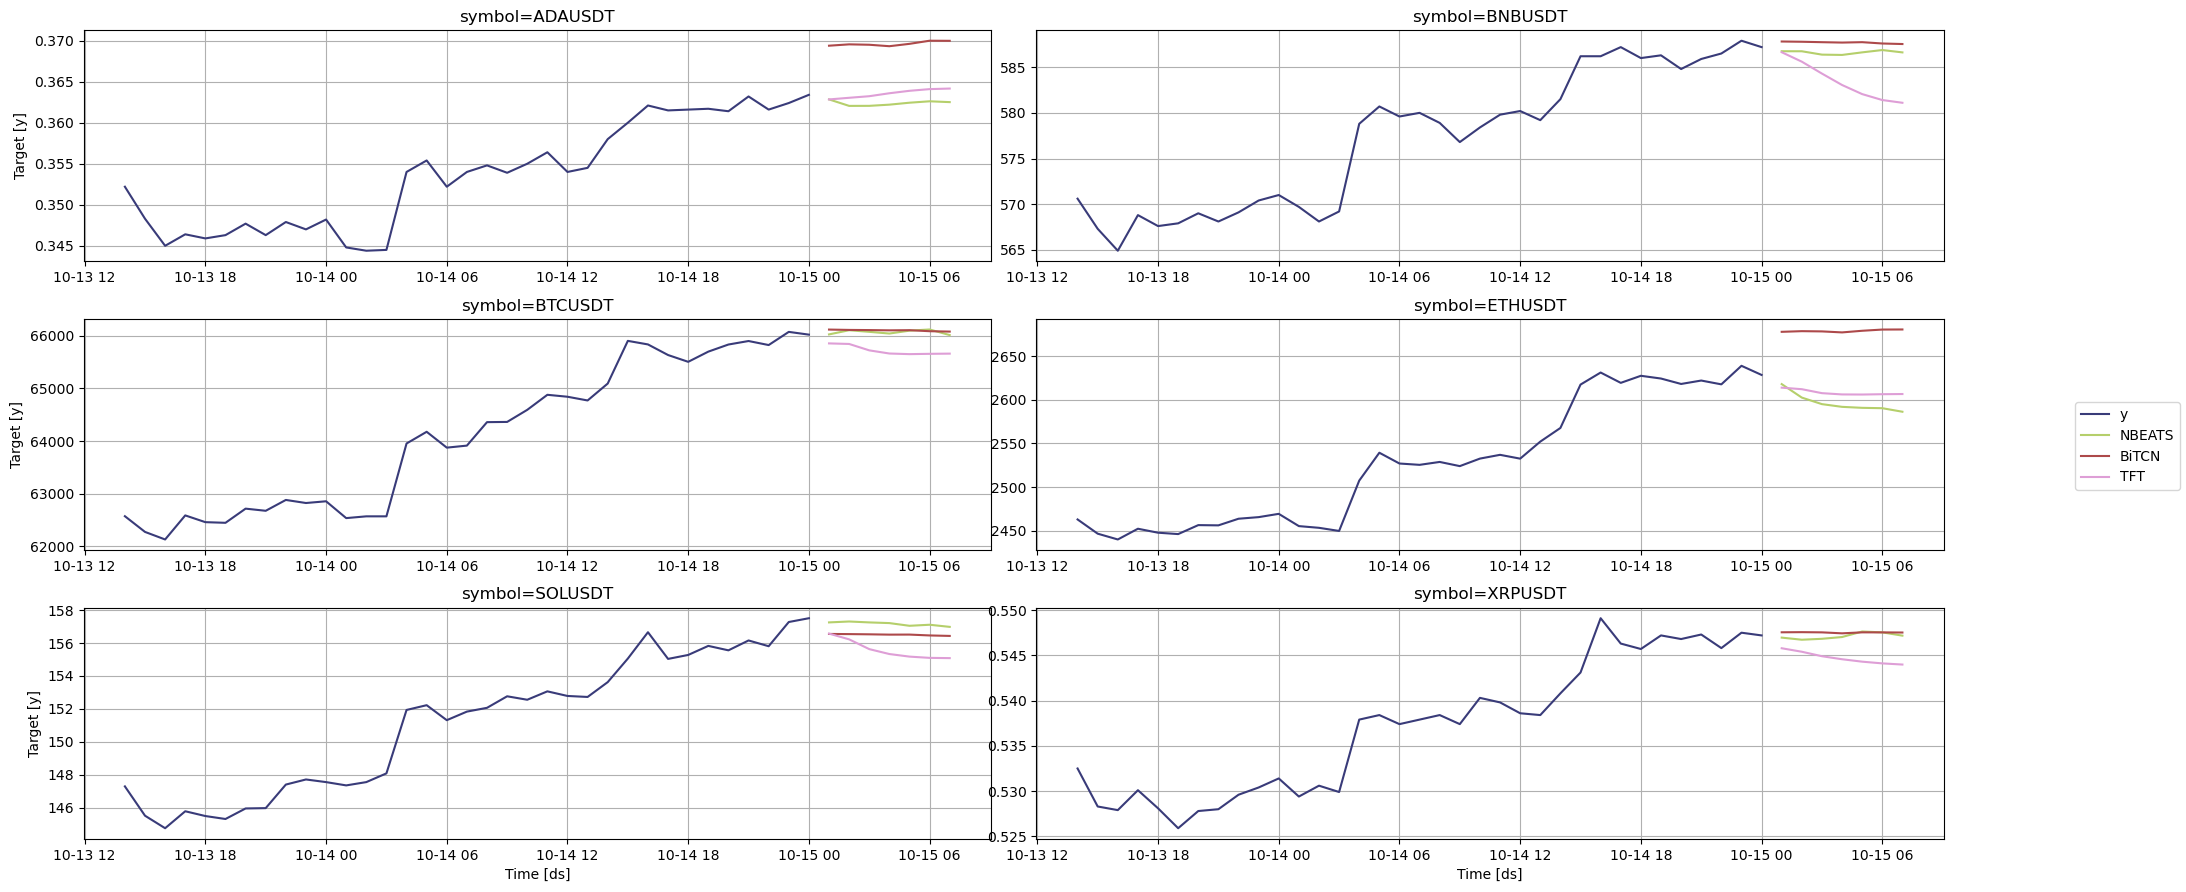

In [18]:
StatsForecast.plot(pred_frame, fcst_df, engine='matplotlib',id_col=id_col, max_insample_length=context_length,)


In [22]:
test_data

,y,ds,symbol,feature_hour_of_day,feature_day_of_week,feature_day_of_month,feature_day_of_year,feature_BBANDS_BB_UPPER,feature_BBANDS_BB_MIDDLE,feature_BBANDS_BB_LOWER,feature_MACD_MACD,feature_MACD_SIGNAL,feature_14_period_RSI,feature_14_period_STOCH_%K
0,0.3524,2024-10-13 13:00:00,ADAUSDT,0.065217,0.500000,-0.100000,0.283562,0.357418,0.353895,0.350372,0.000508,0.000887,44.864573,18.421053
1,0.3522,2024-10-13 14:00:00,ADAUSDT,0.108696,0.500000,-0.100000,0.283562,0.357423,0.353820,0.350217,0.000314,0.000772,44.103142,15.789474
2,0.3483,2024-10-13 15:00:00,ADAUSDT,0.152174,0.500000,-0.100000,0.283562,0.357949,0.353590,0.349231,-0.000153,0.000587,32.514671,2.830189
3,0.3450,2024-10-13 16:00:00,ADAUSDT,0.195652,0.500000,-0.100000,0.283562,0.359019,0.353215,0.347411,-0.000780,0.000314,26.233427,6.206897
4,0.3464,2024-10-13 17:00:00,ADAUSDT,0.239130,0.500000,-0.100000,0.283562,0.359465,0.352910,0.346355,-0.001151,0.000021,32.216054,17.006803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.5411,2024-10-19 20:00:00,XRPUSDT,0.369565,0.333333,0.100000,0.300000,0.549908,0.545135,0.540362,-0.001382,-0.000889,34.677298,12.820513
932,0.5427,2024-10-19 21:00:00,XRPUSDT,0.413043,0.333333,0.100000,0.300000,0.549870,0.544985,0.540100,-0.001334,-0.000978,42.263183,33.333333
933,0.5421,2024-10-19 22:00:00,XRPUSDT,0.456522,0.333333,0.100000,0.300000,0.549719,0.544750,0.539781,-0.001329,-0.001048,40.369899,25.641026
934,0.5427,2024-10-19 23:00:00,XRPUSDT,0.500000,0.333333,0.100000,0.300000,0.549131,0.544450,0.539769,-0.001263,-0.001091,43.114263,33.333333


In [28]:
# test_data=test_data.drop('close_date',axis=1)
test_data[exo_gen_cols].values.dtype

dtype('float64')

In [37]:
model.dataset, model.uids, model.last_dates, model.ds = model._prepare_fit(
                df=test_data,
                static_df=None,
                sort_df=model.sort_df,
                predict_only=False,
                id_col=model.id_col,
                time_col=model.time_col,
                target_col=model.target_col,
            )


In [38]:
test_pred_insample = model.predict_insample(step_size=horizon)


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [40]:
test_pred_insample

,ds,cutoff,NBEATS,BiTCN,TFT,y
symbol,,,,,,
ADAUSDT,2024-10-13 15:00:00,2024-10-13 14:00:00,0.352281,0.352328,0.354753,0.3483
ADAUSDT,2024-10-13 16:00:00,2024-10-13 14:00:00,0.352335,0.352332,0.355883,0.3450
ADAUSDT,2024-10-13 17:00:00,2024-10-13 14:00:00,0.352347,0.352329,0.356847,0.3464
ADAUSDT,2024-10-13 18:00:00,2024-10-13 14:00:00,0.352375,0.352333,0.357572,0.3459
ADAUSDT,2024-10-13 19:00:00,2024-10-13 14:00:00,0.352448,0.352336,0.357816,0.3463
...,...,...,...,...,...,...
XRPUSDT,2024-10-19 20:00:00,2024-10-19 17:00:00,0.544585,0.545098,0.541307,0.5411
XRPUSDT,2024-10-19 21:00:00,2024-10-19 17:00:00,0.544938,0.545107,0.540701,0.5427
XRPUSDT,2024-10-19 22:00:00,2024-10-19 17:00:00,0.545743,0.545111,0.540029,0.5421


In [ ]:
def prepare_preds(t,df):
    for symb,t_cut in df.groupby('symbol'):
        t_cut=t_cut.T
        t_cut.columns=[f'H_{i}' for i in range(horizon)]
        t_cut=t_cut.drop('cutoff')
        # t_cut=t_cut.drop('cutoff')
        # t_cut['symbol']=symb
        t_cut .index=[f'pred_{m}_{symb}' if m !='ds' else m for m in t_cut.index ]
        t_cut=t_cut.T
        t_cut['symbol']=symb
        

In [94]:
idx,cut_data=next(iter(test_pred_insample.groupby(['cutoff','symbol'])))
def flatten_preds(idx,cut_data):
    t_off_pred,symb=idx
    t_cut=cut_data.T
    t_cut.columns=[f'H{i}' for i in range(horizon)]
    t_cut=t_cut.drop('cutoff')
    t_cut=t_cut.drop('ds')
    t_cut=t_cut.drop('y')


    flat_cols=[f'feature_{model}_{horizon}' for model in t_cut.index for horizon in t_cut.columns]
    pred_values=t_cut.values.flatten()

    flat_df=pd.DataFrame([pred_values],columns=flat_cols)
    id_cols=['ds','symbol']

    flat_df[id_cols]=t_off_pred,symb
    flat_df=  flat_df[id_cols+flat_cols]
    return flat_df

def simulate_forecasts(model,df):
    model.dataset, model.uids, model.last_dates, model.ds = model._prepare_fit(
                df=test_data,
                static_df=None,
                sort_df=model.sort_df,
                predict_only=False,
                id_col=model.id_col,
                time_col=model.time_col,
                target_col=model.target_col,
            )
    
    
    return model.predict_insample(step_size=1)

def prepare_forecast_data(model,test_data):
    
    pred_df= simulate_forecasts(model,test_data)
    flattened_preds=pd.concat([flatten_preds(idx,cut_data) for idx,cut_data in pred_df.groupby(['cutoff','symbol'])])
    return flattened_preds



prepare_forecast_data(model,test_data)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


,ds,symbol,feature_NBEATS_H0,feature_NBEATS_H1,feature_NBEATS_H2,feature_NBEATS_H3,feature_NBEATS_H4,feature_NBEATS_H5,feature_NBEATS_H6,feature_BiTCN_H0,...,feature_BiTCN_H4,feature_BiTCN_H5,feature_BiTCN_H6,feature_TFT_H0,feature_TFT_H1,feature_TFT_H2,feature_TFT_H3,feature_TFT_H4,feature_TFT_H5,feature_TFT_H6
0,2024-10-13 12:00:00,ADAUSDT,0.352281,0.352335,0.352347,0.352375,0.352448,0.352477,0.352481,0.352328,...,0.352336,0.352334,0.352333,0.354753,0.355883,0.356847,0.357572,0.357816,0.357773,0.357595
0,2024-10-13 12:00:00,BNBUSDT,592.785828,592.849365,592.864319,592.896362,592.982666,593.016235,593.020386,592.841125,...,592.850952,592.848022,592.847595,595.685852,597.010559,598.141907,598.991516,599.278625,599.227661,599.018738
0,2024-10-13 12:00:00,BTCUSDT,67248.281250,67261.421875,67264.523438,67271.156250,67289.007812,67295.953125,67296.812500,67259.726562,...,67261.750000,67261.148438,67261.062500,67848.460938,68122.625000,68356.765625,68532.601562,68592.031250,68581.476562,68538.234375
0,2024-10-13 12:00:00,ETHUSDT,2617.346436,2617.614990,2617.678467,2617.813965,2618.178711,2618.320801,2618.338379,2617.580322,...,2617.621826,2617.609619,2617.607666,2629.611816,2635.214600,2639.999512,2643.593018,2644.807373,2644.591797,2643.708252
0,2024-10-13 12:00:00,SOLUSDT,154.249329,154.265839,154.269730,154.278061,154.300491,154.309219,154.310303,154.263702,...,154.266251,154.265503,154.265381,155.003326,155.347748,155.641907,155.862808,155.937454,155.924210,155.869888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2024-10-19 17:00:00,BNBUSDT,594.395752,594.378845,594.161987,593.643616,593.371948,593.028992,592.896423,595.674011,...,595.678772,595.669617,595.670471,594.805176,595.235474,595.575684,595.784119,595.865417,595.896851,595.920166
0,2024-10-19 17:00:00,BTCUSDT,68123.937500,68151.750000,68121.992188,68124.750000,68160.828125,68155.796875,68141.937500,68195.000000,...,68193.656250,68189.273438,68188.882812,68160.875000,68196.468750,68215.976562,68226.492188,68226.281250,68222.171875,68219.164062
0,2024-10-19 17:00:00,ETHUSDT,2639.094482,2637.511230,2635.981445,2635.435059,2635.114258,2635.179932,2634.290039,2638.882080,...,2638.872070,2638.765381,2638.711914,2642.074951,2646.369629,2649.272461,2650.725098,2651.203125,2650.749023,2650.229492
0,2024-10-19 17:00:00,SOLUSDT,155.962326,155.754715,155.276596,155.174713,154.863358,154.674759,154.504379,155.187698,...,155.175964,155.178696,155.176392,155.811768,155.583466,155.325287,155.025269,154.725647,154.609894,154.648132


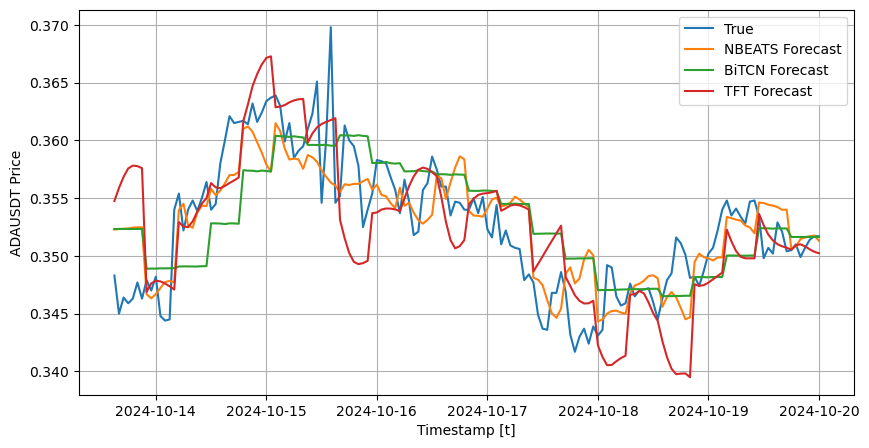

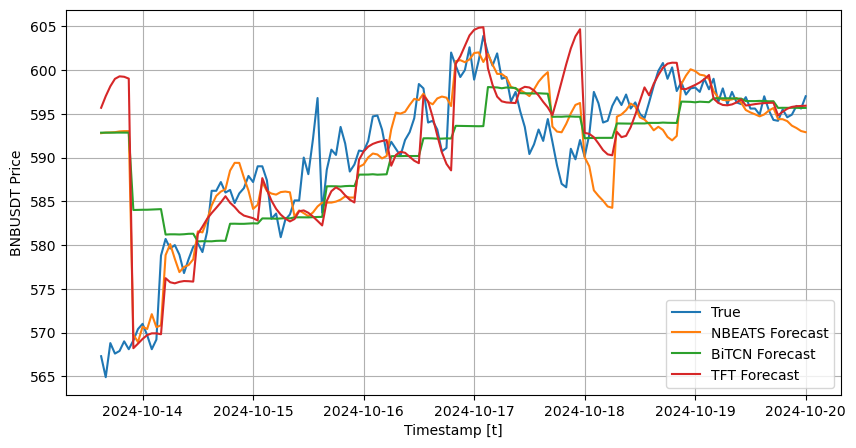

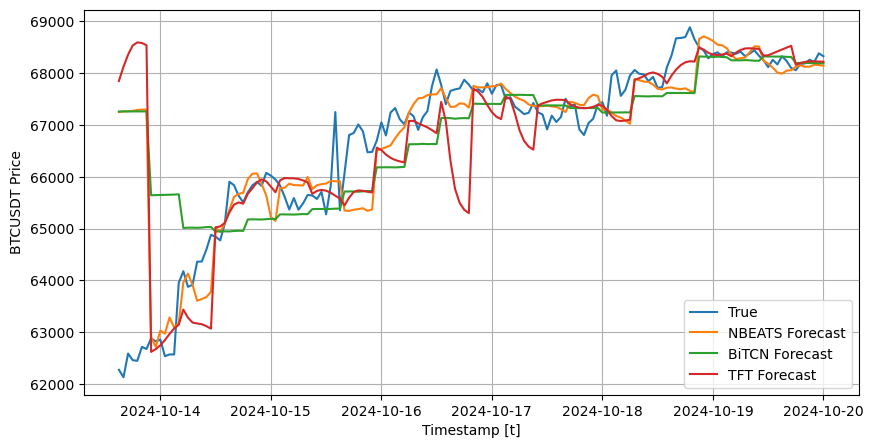

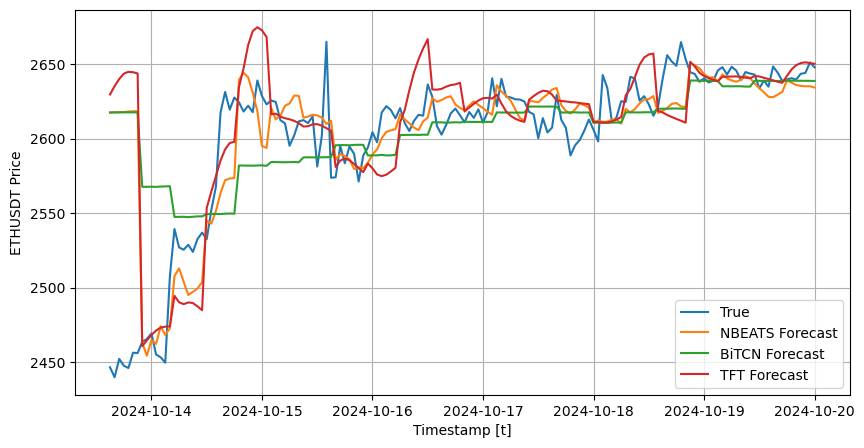

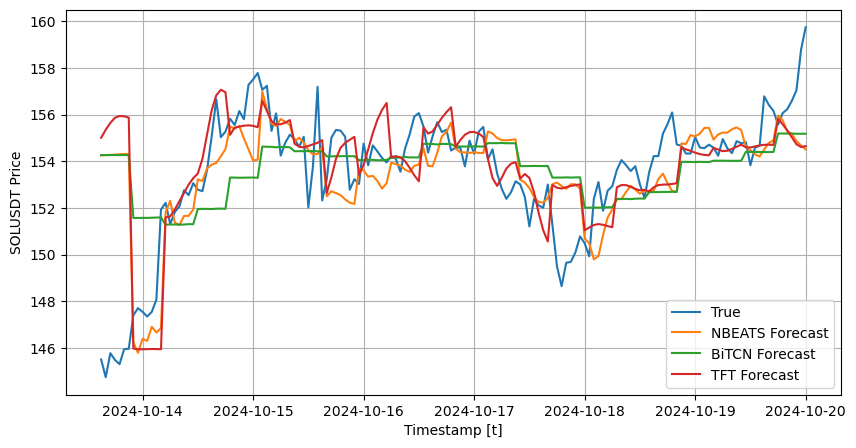

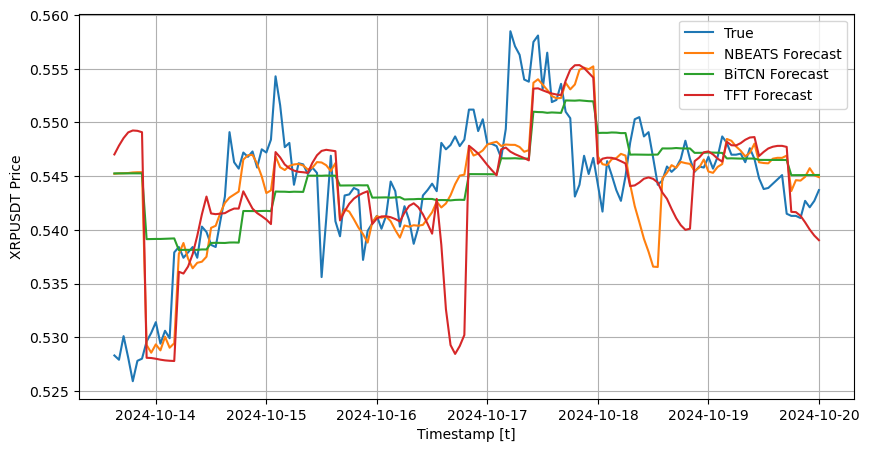

In [82]:
cut_data
for symb,cut in test_pred_insample.groupby('symbol'):
    plt.figure(figsize=(10, 5))
    plt.plot(cut['ds'], cut['y'], label='True')
    plt.plot(cut['ds'], cut['NBEATS'], label='NBEATS Forecast')
    plt.plot(cut['ds'], cut['BiTCN'], label='BiTCN Forecast')
    plt.plot(cut['ds'], cut['TFT'], label='TFT Forecast')
    # plt.axvline(cut['ds'].iloc[-12], color='black', linestyle='--', label='Train-Test Split')
    plt.xlabel('Timestamp [t]')
    plt.ylabel(f'{symb} Price')
    plt.grid()
    plt.legend()

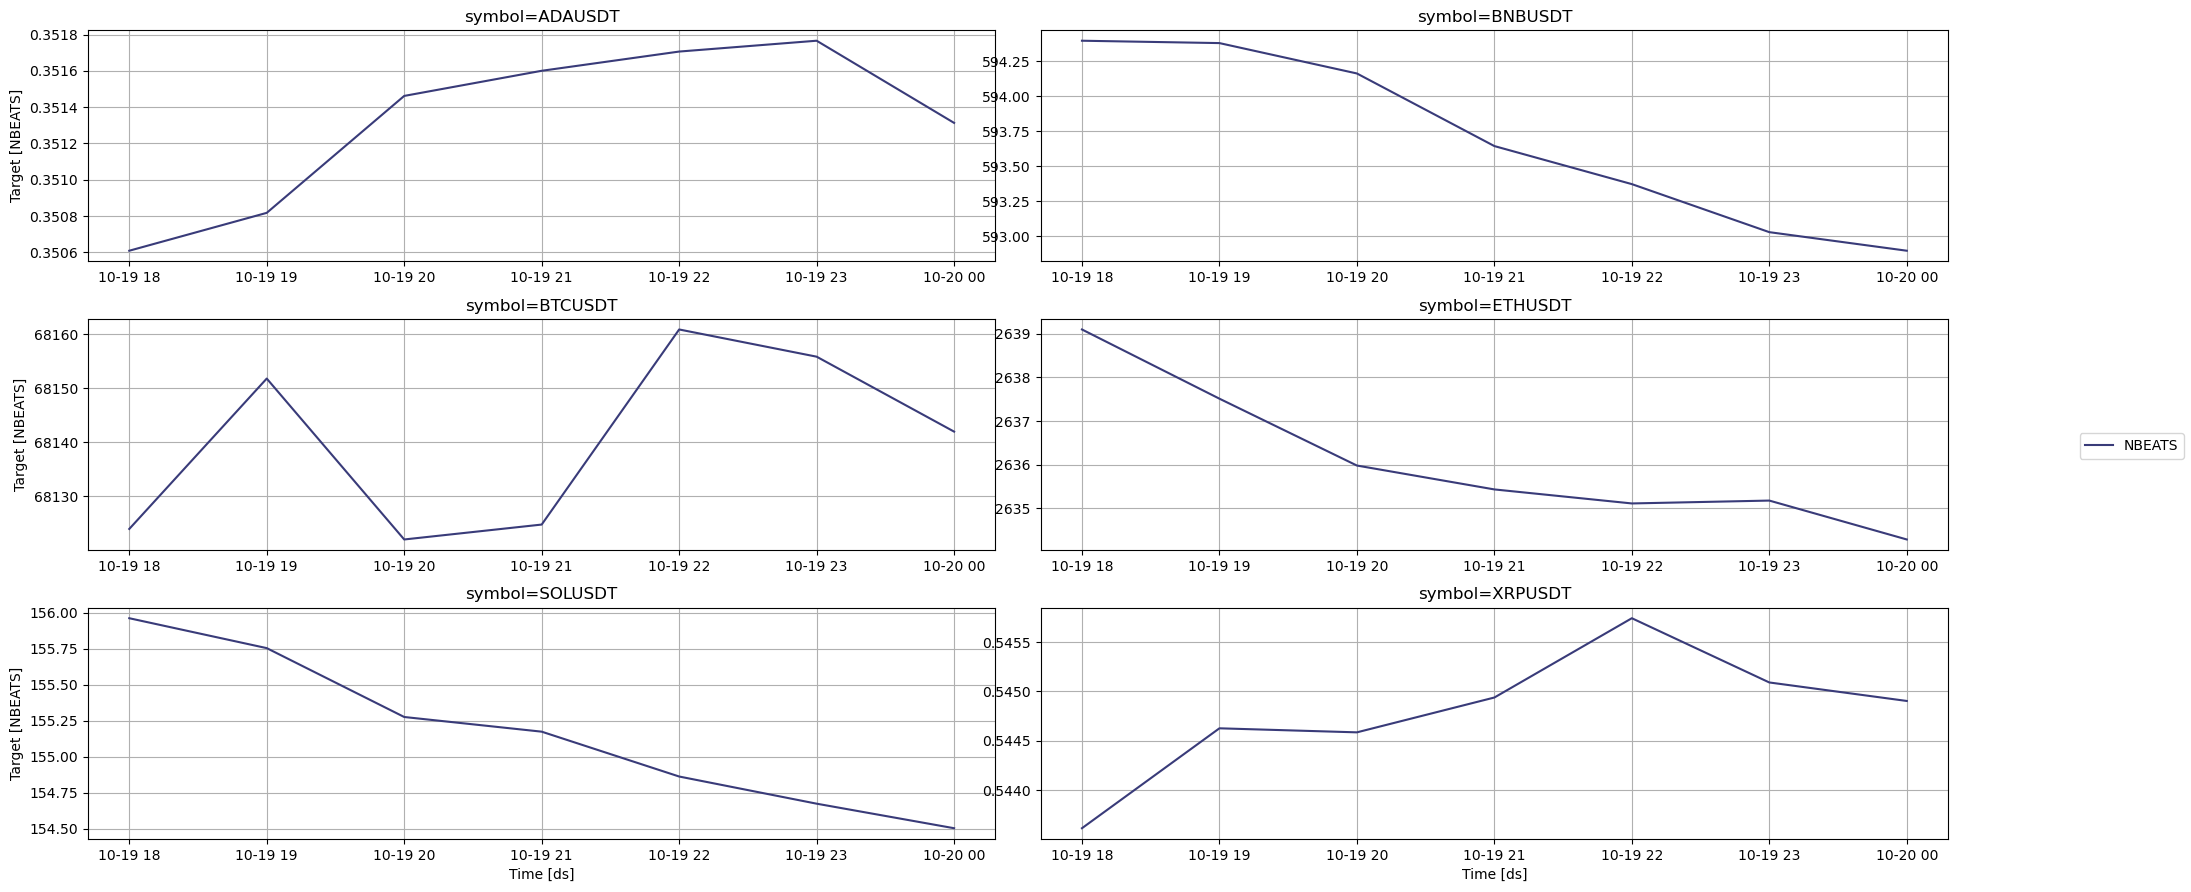

In [50]:
# StatsForecast.plot(test_pred_insample, engine='matplotlib',time_col='ds',id_col=id_col, max_insample_length=horizon,)
StatsForecast.plot(test_pred_insample, engine='matplotlib',time_col='ds',id_col=id_col,target_col='NBEATS', max_insample_length=horizon,)


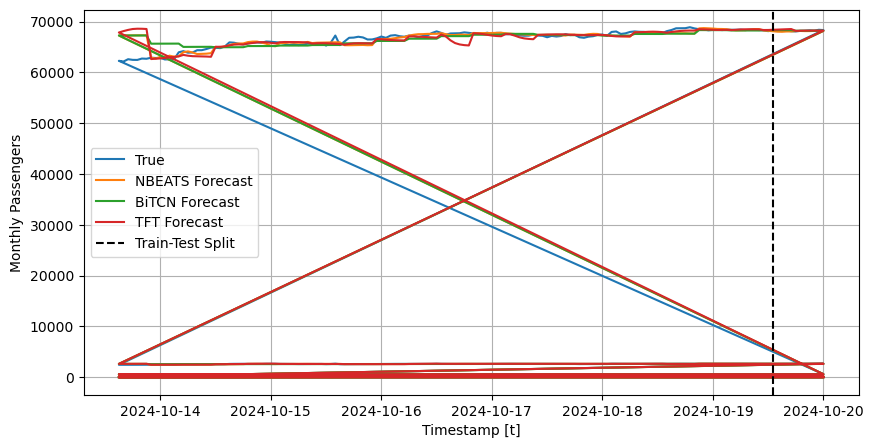

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(test_pred_insample['ds'], test_pred_insample['y'], label='True')
plt.plot(test_pred_insample['ds'], test_pred_insample['NBEATS'], label='NBEATS Forecast')
plt.plot(test_pred_insample['ds'], test_pred_insample['BiTCN'], label='BiTCN Forecast')
plt.plot(test_pred_insample['ds'], test_pred_insample['TFT'], label='TFT Forecast')
plt.axvline(test_pred_insample['ds'].iloc[-12], color='black', linestyle='--', label='Train-Test Split')
plt.xlabel('Timestamp [t]')
plt.ylabel('Monthly Passengers')
plt.grid()
plt.legend()

In [ ]:
class NFPredictor():
    def __init__(self,model_path,h,context_length,time_frame,exo_gen_cols):
        self.model_path=model_path
        self.h=h
        self.context_length=context_length
        self.time_frame=time_frame
        self.nf=NeuralForecast.load(model_path)

    def predict_from_date(self,df,date):
        buffer_date=self.get_buffer_date(date)
        
        return self.nf.predict(df)

    def prepare_df(self,df):

        return self.nf.prepare_df(df)
    
    def get_buffer_date(self,date):
        units=self.time_frame[-1]
        value=int(self.time_frame[0])*self.context_length

        buffer=pd.Timedelta(units=units,value=value)
        return date-buffer
